<a href="https://colab.research.google.com/github/Hasaanmaqsood/Face-recognition-using-convolutional-neural-network/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference:https://github.com/syamkakarla98/Face_Recognition_Using_Convolutional_Neural_Networks

full documentation: https://www.grin.com/document/380686#:~:text=The%20main%20problem%20of%20face,images%20present%20in%20the%20database.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing essential libraries

In [ ]:
pip install tensorflow

In [3]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Uploading dataset from google drive

In [4]:
# Reading Data
fd = pd.read_csv('/content/drive/MyDrive/Machine Learning ( Projects ) /FYP_CS/finial/combine_2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df = fd.iloc[:-1 , :]

In [6]:
df.head()

,pix-1,pix-2,pix-3,pix-4,pix-5,pix-6,pix-7,pix-8,pix-9,pix-10,...,pix-9992,pix-9993,pix-9994,pix-9995,pix-9996,pix-9997,pix-9998,pix-9999,pix-10000,class
0,46,44.0,40.0,101.0,181.0,127.0,97.0,60.0,55.0,77.0,...,19.0,20.0,22.0,23.0,29.0,35.0,31.0,34.0,43.0,0.0
1,50,51.0,52.0,52.0,52.0,53.0,53.0,53.0,53.0,53.0,...,54.0,53.0,55.0,63.0,71.0,77.0,80.0,81.0,87.0,0.0
2,59,59.0,59.0,58.0,59.0,57.0,59.0,62.0,57.0,102.0,...,49.0,50.0,52.0,55.0,59.0,60.0,60.0,59.0,56.0,0.0
3,67,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,27.0,1.0,4.0,5.0,2.0,12.0,47.0,128.0,128.0,0.0
4,58,63.0,65.0,69.0,71.0,75.0,78.0,82.0,84.0,84.0,...,22.0,22.0,22.0,23.0,25.0,32.0,43.0,58.0,67.0,0.0


In [7]:
df.tail()

,pix-1,pix-2,pix-3,pix-4,pix-5,pix-6,pix-7,pix-8,pix-9,pix-10,...,pix-9992,pix-9993,pix-9994,pix-9995,pix-9996,pix-9997,pix-9998,pix-9999,pix-10000,class
3148,1,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,...,51.0,4.0,1.0,3.0,3.0,2.0,14.0,33.0,57.0,2.0
3149,229,229.0,229.0,229.0,229.0,228.0,228.0,228.0,228.0,228.0,...,42.0,44.0,48.0,52.0,53.0,57.0,60.0,59.0,55.0,2.0
3150,13,13.0,12.0,12.0,13.0,13.0,13.0,13.0,14.0,14.0,...,98.0,110.0,114.0,106.0,103.0,103.0,102.0,102.0,102.0,2.0
3151,4,4.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
3152,251,251.0,251.0,251.0,251.0,251.0,250.0,250.0,250.0,250.0,...,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,218.0,2.0


In [8]:
X = df.iloc[:, :100*100].values.reshape(-1, 100, 100, 1) 
y = df.iloc[:, -1].values

In [9]:
X.shape

(3153, 100, 100, 1)

In [10]:
y.shape

(3153,)

In [11]:
df.describe()

,pix-2,pix-3,pix-4,pix-5,pix-6,pix-7,pix-8,pix-9,pix-10,pix-11,...,pix-9992,pix-9993,pix-9994,pix-9995,pix-9996,pix-9997,pix-9998,pix-9999,pix-10000,class
count,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,...,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000
mean,117.880114,118.109420,118.223279,118.392008,118.014272,117.781795,117.890580,117.866476,117.959721,118.207104,...,96.888360,96.926736,97.342531,97.268950,97.188075,97.799239,98.286394,98.177926,98.024738,0.980019
std,81.791335,81.811508,81.669219,81.274109,81.116081,81.071046,80.998608,80.788266,80.631285,80.482393,...,77.918989,77.790801,78.002079,77.774538,77.639377,78.126471,78.180739,77.996362,78.026865,0.814241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,46.000000,46.000000,47.000000,47.000000,47.000000,46.000000,48.000000,48.000000,48.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,34.000000,33.000000,33.000000,0.000000
50%,103.000000,103.000000,103.000000,103.000000,103.000000,102.000000,103.000000,102.000000,101.000000,103.000000,...,71.000000,71.000000,71.000000,71.000000,72.000000,72.000000,73.000000,73.000000,72.000000,1.000000
75%,202.000000,202.000000,201.000000,201.000000,200.000000,200.000000,200.000000,200.000000,200.000000,199.000000,...,161.000000,159.000000,161.000000,161.000000,160.000000,163.000000,165.000000,162.000000,162.000000,2.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,2.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Columns: 10001 entries, pix-1 to class
dtypes: float64(10000), object(1)
memory usage: 240.6+ MB


#Data splitting (Train and test)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.15)

print(f'Train Size - {X_train.shape}\nTest Size - {X_test.shape}')

Train Size - (2680, 100, 100, 1)
Test Size - (473, 100, 100, 1)


#Specify No of classes

In [14]:
from datetime import datetime 


In [15]:
from datetime import datetime 
num_classes = 3
model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

#CNN custom (Modified) model

## CNN model 

In [16]:
#try the old cnn model 
model = Sequential(name = model_name)

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(100, 100, 1)))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization()) #----------------
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) #----------------

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "Face_trained_model_11_31_39_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        102464    
                                                                 
 batch_normalization_2 (Batc  (None, 9

##Learning rate, optimizer anad model compiler

In [17]:
learning_rate = 0.001
optimizer = RMSprop(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=200,
                                            verbose=1,
                                            factor=0.2)

ch = ModelCheckpoint('models/'+model_name+'.h5', monitor='val_acc', verbose=0, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/"+datetime.now().strftime("%Y%m%d-%H%M%S"))


##Run the model 

In [21]:
history= model.fit(np.asarray(X_train).astype('float32'),np.asarray(y_train).astype('float32'), batch_size=256, epochs=30, 
          validation_data=(np.array(X_test, dtype=np.float),np.array(y_test, dtype=np.float)))


#validation_data=(np.array(X_test, dtype=np.float),np.array(Y_test, dtype=np.float))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


11/11 [==============================] - 8s 735ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.0073 - val_accuracy: 0.8055
Epoch 2/30
11/11 [==============================] - 8s 736ms/step - loss: 9.8579e-04 - accuracy: 1.0000 - val_loss: 0.3313 - val_accuracy: 0.8901
Epoch 3/30
11/11 [==============================] - 8s 742ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 9.3258 - val_accuracy: 0.4736
Epoch 4/30
11/11 [==============================] - 8s 747ms/step - loss: 0.1709 - accuracy: 0.9638 - val_loss: 2.9774 - val_accuracy: 0.6110
Epoch 5/30
11/11 [==============================] - 8s 747ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 1.3448 - val_accuracy: 0.7252
Epoch 6/30
11/11 [==============================] - 8s 742ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.5140 - val_accuracy: 0.7273
Epoch 7/30
11/11 [==============================] - 8s 741ms/step - loss: 0.0521 - accuracy: 0.9836 - val_loss: 1.0377 - val_accuracy: 0.8118
Epoch 8/30
11

#Accuracy and Loss results

In [22]:
loss, acc = model.evaluate(np.asarray(X_train).astype('float32'),np.asarray(y_train).astype('float32'))
print(f'Loss: {loss}\nAccuracy: {acc*100}')

84/84 [==============================] - 2s 29ms/step - loss: 0.1344 - accuracy: 0.9612
Loss: 0.13438792526721954
Accuracy: 96.11940383911133


In [ ]:
#save the model in .h5 format
model.save("my_h5_model.h5")

##Plot the train_acc and val_acc

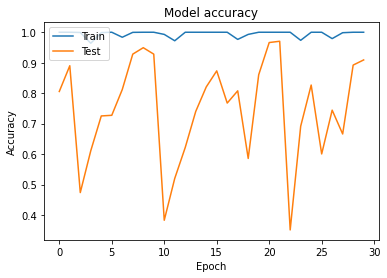

In [23]:
acc = plt.plot(history.history['accuracy'])
val_acc = plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Plot the loss and val_loss

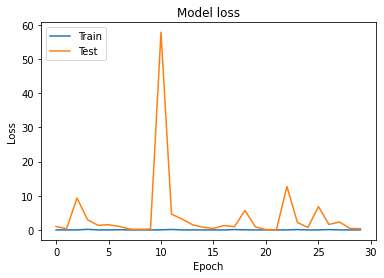

In [24]:
# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs/

In [25]:
from sklearn.metrics import classification_report
prediction = model.predict(np.array(X_test, dtype=np.float))
pred = prediction.astype(np.int32).tolist()
pred = np.argmax(prediction, axis=1)

print(classification_report(y_test,pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       180
         1.0       0.98      0.78      0.87       160
         2.0       0.94      0.95      0.95       133

    accuracy                           0.91       473
   macro avg       0.92      0.91      0.91       473
weighted avg       0.92      0.91      0.91       473



##  precision, recall, f1-score , support Matrix

In [26]:
from sklearn.metrics import classification_report
prediction = model.predict(np.array(X_test, dtype=np.float))
pred = prediction.astype(np.int32).tolist()
pred = np.argmax(prediction, axis=1)

print(classification_report(y_test,pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       180
         1.0       0.98      0.78      0.87       160
         2.0       0.94      0.95      0.95       133

    accuracy                           0.91       473
   macro avg       0.92      0.91      0.91       473
weighted avg       0.92      0.91      0.91       473



## confusion_matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


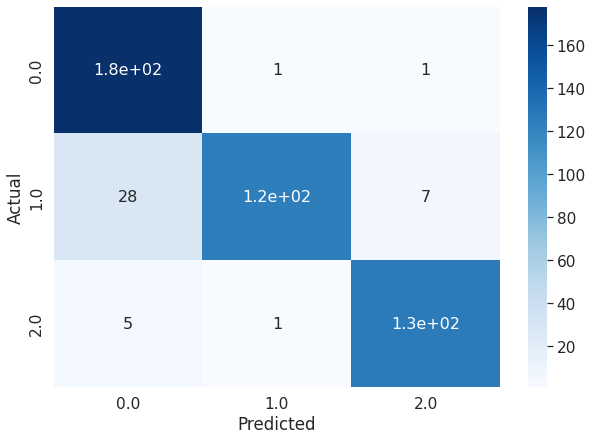

In [27]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import seaborn as sn
y_true = np.array(y_test, dtype=np.float)
y_pred = pred
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

##f1_score, (y_true, y_pred) 
##precision_score, (y_true, y_pred)
##recall_score, (y_true, y_pred)

In [29]:
print(f1_score(y_true, y_pred, average="macro")*100)
print(precision_score(y_true, y_pred, average="macro")*100)
print(recall_score(y_true, y_pred, average="macro")*100) 

90.97757556355032
92.2864868326425
90.83420356446673


##Headtmap

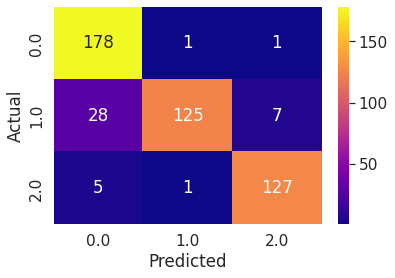

In [30]:
sn.heatmap(df_cm, annot=True, fmt="d", cmap="plasma");


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


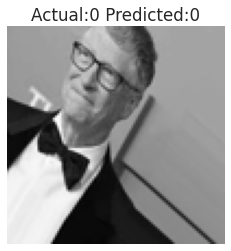

In [31]:
rand_n = np.random.randint(X_test.shape[0])
img = np.array(X_test[rand_n][:, :, 0],dtype=np.float)
plt.imshow(img,cmap='gray')
plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted:{pred[rand_n]}');
plt.axis('off')
plt.show()

In [ ]:
# Verify
rand_n = np.random.randint(X_test.shape[0])
plt.imshow(img,cmap='gray')
plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
plt.axis('off')
plt.show()

In [ ]:
X_test[1].shape

(100, 100, 1)

In [33]:
def plot_predictions(r=5 ,c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(15, 15))
 # plt.imshow(X_test[2], cmap='gray')
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(X_test.shape[0])
      img = np.array(X_test[rand_n][:, :, 0],dtype=np.float)
      plt.imshow(img,cmap='gray')
      plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted:{pred[rand_n]}');
      
      plt.axis('off')
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


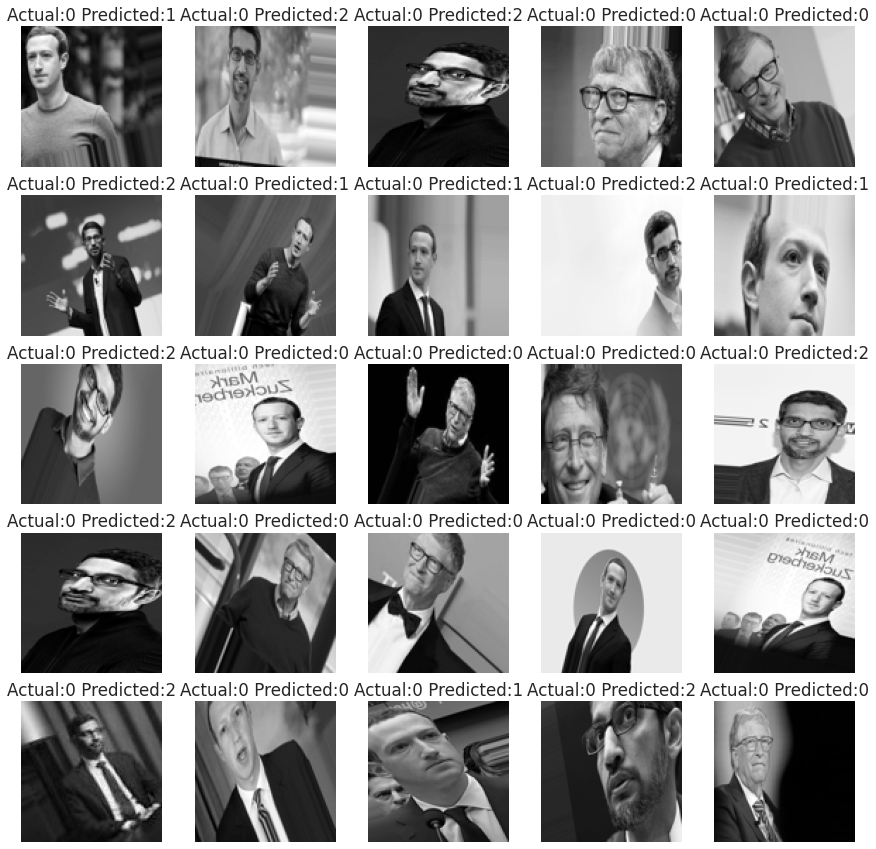

In [34]:
plot_predictions()

In [35]:
# serialize weights to HDF5
model.save(model_name+".h5")
print("Model Saved to disk")

Model Saved to disk


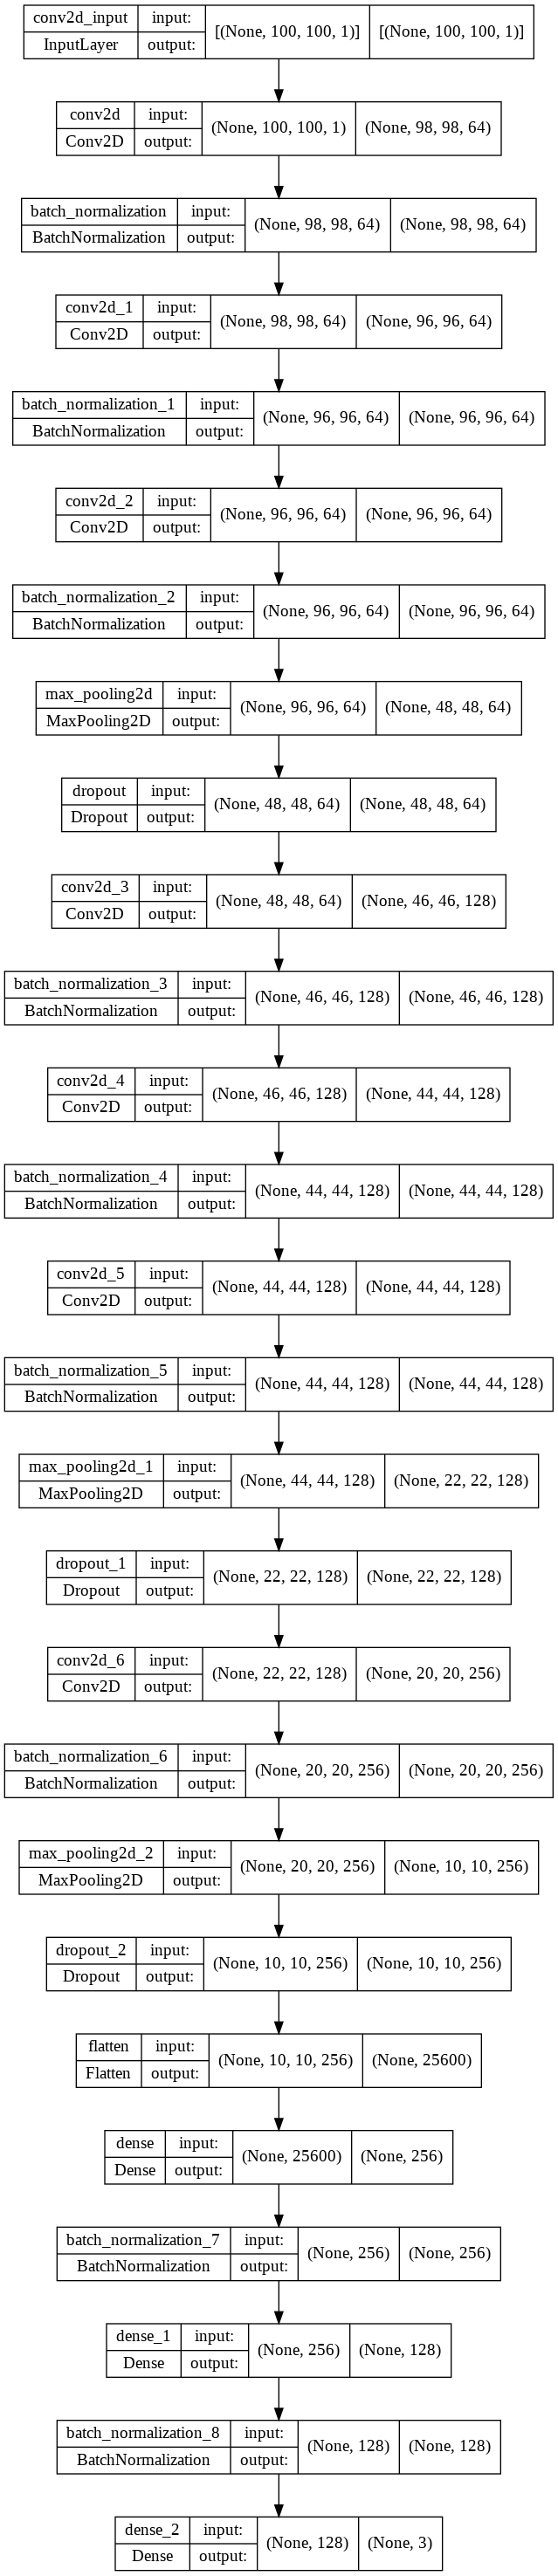

In [37]:
tf.keras.utils.plot_model(
    model,
    to_file='model_with_shapes.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

## Intermediate layer visualization of the CNN

In [38]:
model.summary()

Model: "Face_trained_model_11_31_39_"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        102464    
                                                                 
 batch_normalization_2 (Batc  (None, 9

In [39]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:20]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [40]:
def plot_predictions(r=5 ,c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(15, 15))
 # plt.imshow(X_test[2], cmap='gray')
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(X_test.shape[0])
      img = np.array(X_test[rand_n][:, :, 0],dtype=np.float)
      plt.imshow(img,cmap='gray')
      plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted:{pred[rand_n]}');
      
      plt.axis('off')
  plt.show()

TypeError: ignored

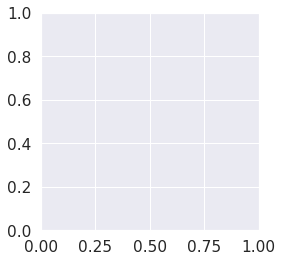

In [41]:
plt.imshow(X_test[28][:,:,0], cmap='gray');
plt.axis('off');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


TypeError: ignored

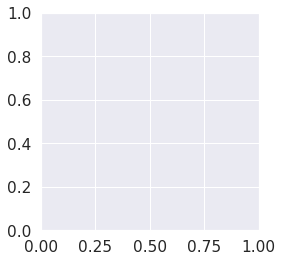

In [42]:
img = np.array(X_test[28],dtype=np.float)
plt.imshow(img)
plt.axis('off')

In [ ]:
plt.imshow(np.array(X_test[28], cmap='gray', dtype=np.float));
plt.axis('off');

In [ ]:
activations = activation_model.predict(X_test[28].reshape(-1, 100, 100, 1))

In [ ]:
count =0
for layer in activations:
  count+=1
  print('Layer:%2d    Shape: %s ' %(count, str(layer.shape)))

##MOdel import 

In [ ]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('/content/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('/content/0.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


[[0.509623   0.42396578 0.00078298 0.01844455 0.04718371]]


In [ ]:
model.save("my_h5_model.h5")

# New Section

# New Section